In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
type(train_data), train_data.shape, train_data.dtype

(numpy.ndarray, (60000, 28, 28), dtype('uint8'))

In [4]:
train_data.min(), train_data.max()

(0, 255)

In [5]:
test_data.min(), test_data.max()

(0, 255)

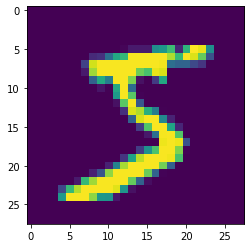

In [6]:
plt.imshow(train_data[0])

In [7]:
train_labels[0]

5

In [8]:
train_data = np.reshape(train_data, (-1, 28 * 28))
train_data.shape

(60000, 784)

In [9]:
test_data = np.reshape(test_data, (-1, 28 * 28))
test_data.shape

(10000, 784)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
train_labels = to_categorical(train_labels, num_classes=10)
train_labels.shape

(60000, 10)

In [12]:
test_labels = to_categorical(test_labels, num_classes=10)
test_labels.shape, test_labels.dtype

((10000, 10), dtype('float32'))

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
train_data.min(), train_data.max()

(0, 255)

In [15]:
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

In [16]:
train_data.min(), train_data.max(), train_data.dtype

(0.0, 1.0, dtype('float32'))

In [17]:
train_data = train_data[:30000]
train_labels = train_labels[:30000]
train_data.shape, train_labels.shape

((30000, 784), (30000, 10))

In [18]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [19]:
input_layer = Input(shape=(784,))

h1 = Dense(units=512, activation='relu')(input_layer)

d1 = Dropout(0.25)(h1)

h2 = Dense(units=128, activation='relu')(d1)

d2 = Dropout(0.5)(h2)

output_layer = Dense(units=10, activation='softmax')(d2)

classification_model = Model(input_layer, output_layer)

classification_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________

In [20]:
classification_model.compile(optimizer='adam', loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=100,
                           mode='min', restore_best_weights=True)

In [23]:
classification_model.fit(x=train_data, y=train_labels, epochs=40, batch_size=32,
                         validation_split=0.25, callbacks=[early_stop])

Epoch 1/40
704/704 [==============================] - 2s 3ms/step - loss: 0.4539 - accuracy: 0.8637 - val_loss: 0.2054 - val_accuracy: 0.9345
Epoch 2/40
704/704 [==============================] - 2s 3ms/step - loss: 0.2016 - accuracy: 0.9424 - val_loss: 0.1509 - val_accuracy: 0.9516
Epoch 3/40
704/704 [==============================] - 2s 3ms/step - loss: 0.1482 - accuracy: 0.9556 - val_loss: 0.1354 - val_accuracy: 0.9588
Epoch 4/40
704/704 [==============================] - 2s 3ms/step - loss: 0.1135 - accuracy: 0.9663 - val_loss: 0.1159 - val_accuracy: 0.9649
Epoch 5/40
704/704 [==============================] - 2s 3ms/step - loss: 0.0930 - accuracy: 0.9732 - val_loss: 0.1172 - val_accuracy: 0.9677
Epoch 6/40
704/704 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.1320 - val_accuracy: 0.9643
Epoch 7/40
704/704 [==============================] - 2s 3ms/step - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.1166 - val_accuracy: 0.9691
Epoch 

<AxesSubplot:>

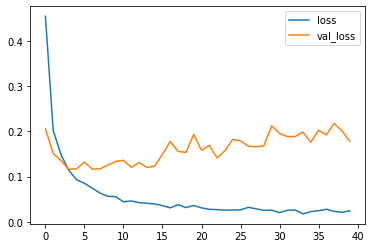

In [24]:
model_history = pd.DataFrame({'loss': classification_model.history.history['loss'],
                              'val_loss': classification_model.history.history['val_loss']})
model_history.plot()

<AxesSubplot:>

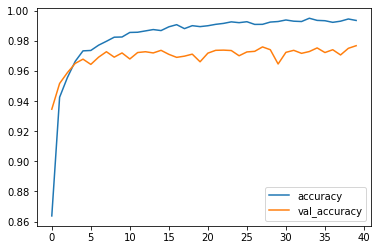

In [25]:
model_history = pd.DataFrame({'accuracy': classification_model.history.history['accuracy'],
                              'val_accuracy': classification_model.history.history['val_accuracy']})
model_history.plot()

In [26]:
classification_model.evaluate(x=test_data, y=test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9767


[0.1656782031059265, 0.9767000079154968]

In [31]:
print(np.argmax(classification_model.predict(np.reshape(test_data[0], (1, 784)))))
print(np.argmax(test_labels[0]))

7
7
